## 1. 데이터 수집 및 전처리
* 행정안전부 > 주민등록인구통계 > 연령별 인구 통계 

    https://jumin.mois.go.kr/index.jsp

    성별구분안함. 1세단위, 0~100세이상, 전체읍면동 현황

In [1]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus']= False

In [3]:
os.listdir('./drive/MyDrive/Colab Notebooks/알파코 파이썬 데이터 시각화 입문/Age Data')

['202210_202210_연령별인구현황_월간.csv']

In [4]:
data_src = "./drive/MyDrive/Colab Notebooks/알파코 파이썬 데이터 시각화 입문/Age Data/202210_202210_연령별인구현황_월간.csv"

## 1.1. 데이터프레임 생성

In [5]:
df = pd.read_csv(data_src, encoding='cp949')
df.head(3)

# 컬럼 정리가 필요해보인다. 행정구역은 인덱스로 쓰면 좋을듯하다.

,행정구역,2022년10월_계_총인구수,2022년10월_계_연령구간인구수,2022년10월_계_0세,2022년10월_계_1세,2022년10월_계_2세,2022년10월_계_3세,2022년10월_계_4세,2022년10월_계_5세,2022년10월_계_6세,...,2022년10월_계_91세,2022년10월_계_92세,2022년10월_계_93세,2022년10월_계_94세,2022년10월_계_95세,2022년10월_계_96세,2022년10월_계_97세,2022년10월_계_98세,2022년10월_계_99세,2022년10월_계_100세 이상
0,서울특별시 (1100000000),"9,443,722","9,443,722","40,810","44,165","44,886","48,835","51,417","55,828","63,944",...,"7,599","6,628","5,436","4,014","2,948","1,801","1,254",926,796,"1,301"
1,서울특별시 종로구 (1111000000),"141,861","141,861",451,478,513,544,562,659,771,...,168,134,111,89,69,47,27,22,16,31
2,서울특별시 종로구 청운효자동(1111051500),"11,700","11,700",45,48,47,55,47,82,77,...,16,7,7,5,5,5,3,3,0,3


## 1.2. 컬럼 삭제

In [6]:
df.drop(columns=['2022년10월_계_총인구수','2022년10월_계_연령구간인구수'], inplace=True)

In [7]:
df.head(1)

,행정구역,2022년10월_계_0세,2022년10월_계_1세,2022년10월_계_2세,2022년10월_계_3세,2022년10월_계_4세,2022년10월_계_5세,2022년10월_계_6세,2022년10월_계_7세,2022년10월_계_8세,...,2022년10월_계_91세,2022년10월_계_92세,2022년10월_계_93세,2022년10월_계_94세,2022년10월_계_95세,2022년10월_계_96세,2022년10월_계_97세,2022년10월_계_98세,2022년10월_계_99세,2022년10월_계_100세 이상
0,서울특별시 (1100000000),"40,810","44,165","44,886","48,835","51,417","55,828","63,944","66,913","66,813",...,"7,599","6,628","5,436","4,014","2,948","1,801","1,254",926,796,"1,301"


## 1.3. 인덱스 변경

In [8]:
df.index=df['행정구역']
df.head()

,행정구역,2022년10월_계_0세,2022년10월_계_1세,2022년10월_계_2세,2022년10월_계_3세,2022년10월_계_4세,2022년10월_계_5세,2022년10월_계_6세,2022년10월_계_7세,2022년10월_계_8세,...,2022년10월_계_91세,2022년10월_계_92세,2022년10월_계_93세,2022년10월_계_94세,2022년10월_계_95세,2022년10월_계_96세,2022년10월_계_97세,2022년10월_계_98세,2022년10월_계_99세,2022년10월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),서울특별시 (1100000000),"40,810","44,165","44,886","48,835","51,417","55,828","63,944","66,913","66,813",...,"7,599","6,628","5,436","4,014","2,948","1,801","1,254",926,796,"1,301"
서울특별시 종로구 (1111000000),서울특별시 종로구 (1111000000),451,478,513,544,562,659,771,827,871,...,168,134,111,89,69,47,27,22,16,31
서울특별시 종로구 청운효자동(1111051500),서울특별시 종로구 청운효자동(1111051500),45,48,47,55,47,82,77,96,100,...,16,7,7,5,5,5,3,3,0,3
서울특별시 종로구 사직동(1111053000),서울특별시 종로구 사직동(1111053000),27,35,36,38,50,60,66,68,77,...,16,11,18,5,6,5,6,2,3,2
서울특별시 종로구 삼청동(1111054000),서울특별시 종로구 삼청동(1111054000),3,6,6,3,9,13,9,15,11,...,3,5,2,3,1,1,0,1,0,2


In [9]:
# 행정구역 컬럼은 삭제
df.drop(columns=['행정구역'], inplace=True)
df.head()

,2022년10월_계_0세,2022년10월_계_1세,2022년10월_계_2세,2022년10월_계_3세,2022년10월_계_4세,2022년10월_계_5세,2022년10월_계_6세,2022년10월_계_7세,2022년10월_계_8세,2022년10월_계_9세,...,2022년10월_계_91세,2022년10월_계_92세,2022년10월_계_93세,2022년10월_계_94세,2022년10월_계_95세,2022년10월_계_96세,2022년10월_계_97세,2022년10월_계_98세,2022년10월_계_99세,2022년10월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),"40,810","44,165","44,886","48,835","51,417","55,828","63,944","66,913","66,813","67,938",...,"7,599","6,628","5,436","4,014","2,948","1,801","1,254",926,796,"1,301"
서울특별시 종로구 (1111000000),451,478,513,544,562,659,771,827,871,839,...,168,134,111,89,69,47,27,22,16,31
서울특별시 종로구 청운효자동(1111051500),45,48,47,55,47,82,77,96,100,87,...,16,7,7,5,5,5,3,3,0,3
서울특별시 종로구 사직동(1111053000),27,35,36,38,50,60,66,68,77,64,...,16,11,18,5,6,5,6,2,3,2
서울특별시 종로구 삼청동(1111054000),3,6,6,3,9,13,9,15,11,13,...,3,5,2,3,1,1,0,1,0,2


## 1.4. 컬럼명 변경

In [10]:
# 연령에 대한 부분만 남기고 삭제
df.columns = df.columns.str.split('_').str[2]

In [11]:
df.head(1)

,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),"40,810","44,165","44,886","48,835","51,417","55,828","63,944","66,913","66,813","67,938",...,"7,599","6,628","5,436","4,014","2,948","1,801","1,254",926,796,"1,301"


## 1.5. 자료형 확인/변경

In [12]:
# 자료형 확인
df.dtypes

0세         object
1세         object
2세         object
3세         object
4세         object
            ...  
96세        object
97세        object
98세        object
99세        object
100세 이상    object
Length: 101, dtype: object

In [13]:
# 문자형을 숫자형으로 변환한다.
# 콤마 삭제 후 변환
df.iloc[:,0].str.replace(',','').astype('int64')

행정구역
서울특별시  (1100000000)             40810
서울특별시 종로구 (1111000000)            451
서울특별시 종로구 청운효자동(1111051500)        45
서울특별시 종로구 사직동(1111053000)          27
서울특별시 종로구 삼청동(1111054000)           3
                                ...  
제주특별자치도 서귀포시 서홍동(5013058000)       87
제주특별자치도 서귀포시 대륜동(5013059000)      116
제주특별자치도 서귀포시 대천동(5013060000)      100
제주특별자치도 서귀포시 중문동(5013061000)       73
제주특별자치도 서귀포시 예래동(5013062000)       13
Name: 0세, Length: 3870, dtype: int64

In [14]:
# 모든 행에 반복해준다.
for i in range(101):
    df.iloc[:,i] =df.iloc[:,i].str.replace(',','').astype('int64')
df.dtypes

0세         int64
1세         int64
2세         int64
3세         int64
4세         int64
           ...  
96세        int64
97세        int64
98세        int64
99세        int64
100세 이상    int64
Length: 101, dtype: object

## 2. 시도-연령별 인구구조

### 2.1. 서브셋 만들기
* 컬럼.str.contains(문자열) : 해당 문자열이 포함된 데이터 추출

In [15]:
# 00000000 를 포함한 인덱스의 데이터만 가져오기
df_sido = df[df.index.str.contains('00000000')].copy()
df_sido

,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),40810,44165,44886,48835,51417,55828,63944,66913,66813,67938,...,7599,6628,5436,4014,2948,1801,1254,926,796,1301
부산광역시 (2600000000),13662,14937,16060,17638,19866,22065,25134,26532,26264,26238,...,3051,2350,2031,1536,1096,604,465,287,247,394
대구광역시 (2700000000),9963,10997,12143,13681,15174,16909,19577,20269,20175,20312,...,2126,1602,1243,976,675,375,302,175,133,250
인천광역시 (2800000000),14426,15777,16823,18793,19775,21800,24560,26117,25678,26143,...,2520,2115,1705,1245,958,588,454,282,251,421
광주광역시 (2900000000),7338,8113,8129,9157,10196,11167,12871,13420,13688,13879,...,1175,1146,753,550,386,265,193,92,133,169
대전광역시 (3000000000),7554,7961,7996,8846,9477,10712,12125,12809,12539,13175,...,1204,1036,783,631,430,246,205,126,109,181
울산광역시 (3100000000),5317,6118,6627,7324,8067,9091,10448,11032,11031,11093,...,658,478,425,317,219,132,112,75,59,60
세종특별자치시 (3600000000),3074,3665,3715,4211,4480,4935,5389,5708,5476,5535,...,257,218,189,138,92,49,39,20,29,32
경기도 (4100000000),73700,79642,83956,92094,99933,108674,123195,130215,128434,129238,...,10537,9305,7212,5476,3831,2370,1838,1182,1063,1732


### 2.2. 시각화

#### 2.2.1. 다중플롯

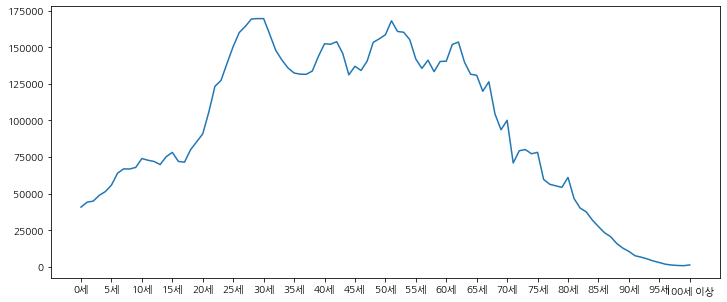

In [16]:
# 서울특별시의 연령별 인구구조
plt.rcParams['figure.figsize']=(12,5)
plt.plot(df_sido.iloc[0])
plt.xticks(range(0,101,5))
plt.show()

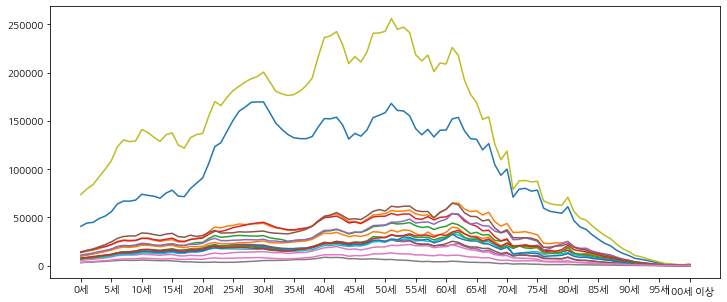

In [17]:
# 구별 연령별 인구구조
for i in range(len(df_sido)):
    plt.plot(df_sido.iloc[i])
plt.xticks(range(0,101,5))
plt.show()

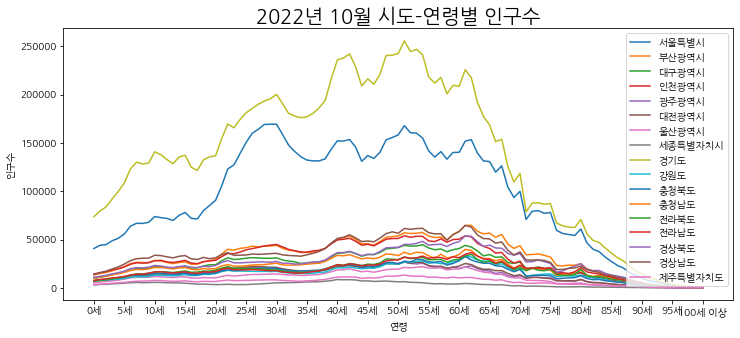

In [33]:
# 범례, 레이블, 제목 표시
for i in range(len(df_sido)):
    plt.plot(df_sido.iloc[i], label=df_sido.index[i].split(' ')[0])
plt.legend()
plt.xticks(range(0,101,5))
plt.xlabel('연령')
plt.ylabel('인구수')
plt.title('2022년 10월 시도-연령별 인구수', size=20)
plt.show()

# 그래프 하나씩 보기가 힘들다.

#### 2.2.2. 서브플롯
* plt.subplot(행,열,순번)

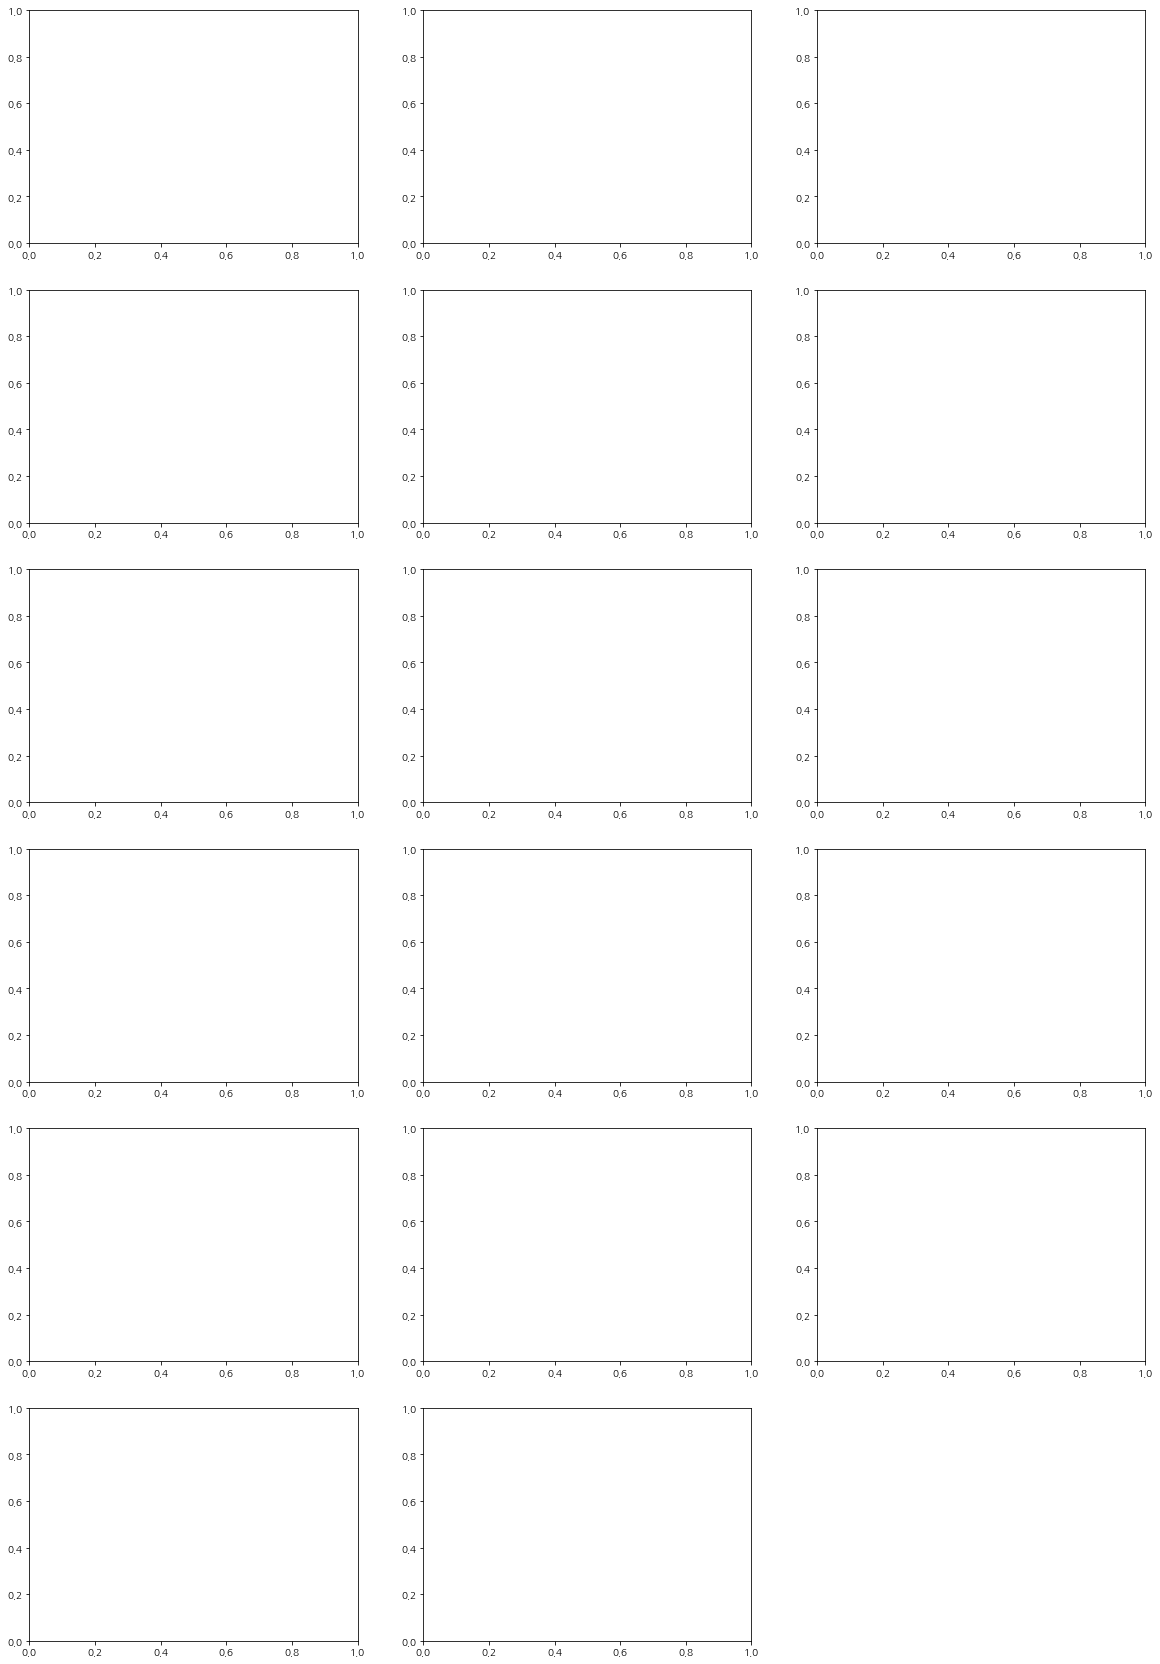

In [19]:
# 틀만들기(17개)
plt.figure(figsize=(20,30))
for i in range(len(df_sido)):
    plt.subplot(6,3,i+1)

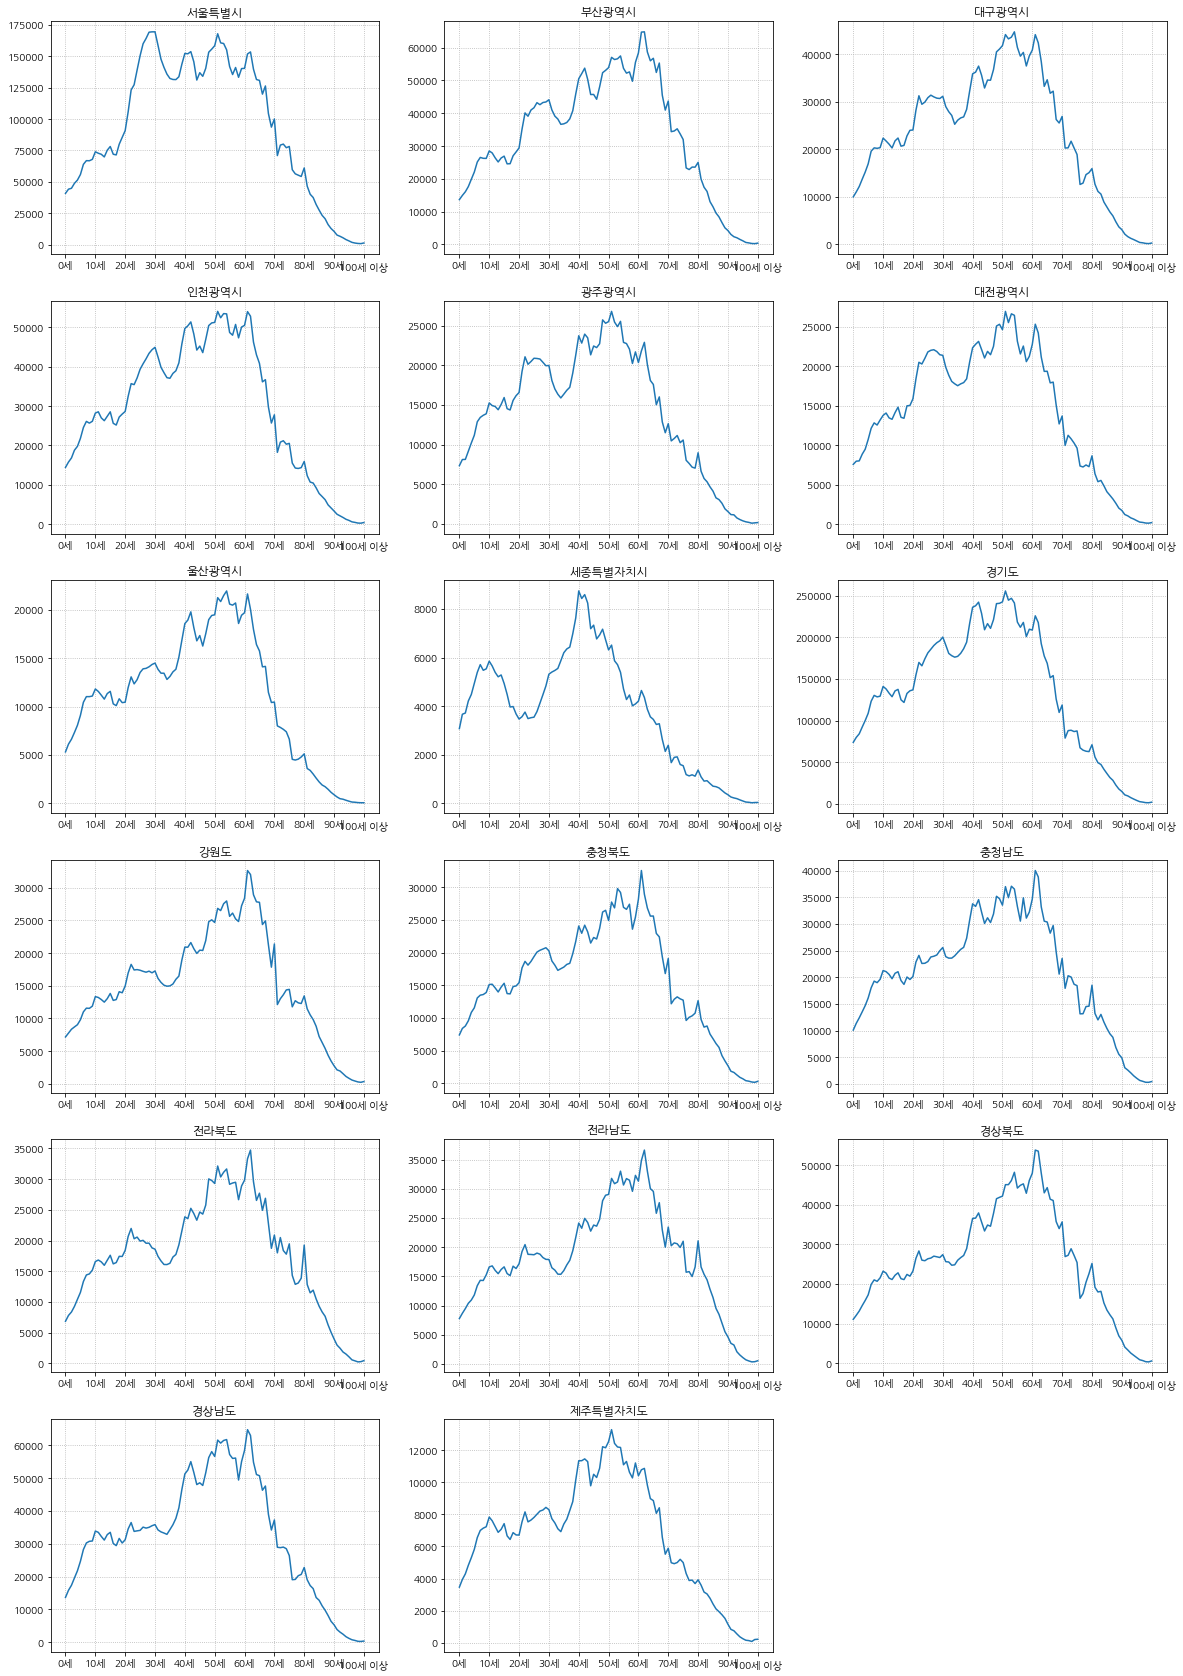

In [20]:
# 그래프 그리기
plt.figure(figsize=(20,30))
for i in range(len(df_sido)):
    plt.subplot(6,3,i+1)
    plt.plot(df_sido.iloc[i])
    plt.xticks(range(0,101,10))
    plt.title(df_sido.index[i].split(' ')[0])
    plt.grid(ls=':')

plt.show()
# 제주를 제외 지방은 60대가 가장 많다.

## 3. 서울시 구별 인구구조

### 3.1. 서브셋 만들기

In [23]:
# 구 (11를 포함하는 데이터만
df_seoul = df[df.index.str.find('구 (11')>0].copy()
df_seoul

# 25개 구

,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 종로구 (1111000000),451,478,513,544,562,659,771,827,871,839,...,168,134,111,89,69,47,27,22,16,31
서울특별시 중구 (1114000000),546,554,577,565,554,618,676,636,630,634,...,142,121,119,95,66,35,18,20,13,30
서울특별시 용산구 (1117000000),1022,1086,1077,1165,1186,1192,1378,1333,1364,1301,...,245,195,207,123,82,52,35,26,36,42
서울특별시 성동구 (1120000000),1632,1712,1724,1801,1848,1901,1996,1937,1943,1863,...,225,187,147,112,92,34,35,24,19,41
서울특별시 광진구 (1121500000),1208,1360,1276,1496,1525,1627,1892,2066,2056,2160,...,218,189,178,119,93,52,47,36,19,42
서울특별시 동대문구 (1123000000),1397,1574,1666,1785,1839,1925,2169,2195,2136,2162,...,271,243,195,138,92,50,50,29,36,54
서울특별시 중랑구 (1126000000),1750,1757,1696,1938,2050,2079,2337,2381,2232,2317,...,311,271,181,184,123,71,54,34,26,51
서울특별시 성북구 (1129000000),1863,2036,2133,2343,2426,2730,3073,3282,3191,3184,...,386,338,255,212,151,86,62,38,32,49
서울특별시 강북구 (1130500000),816,988,1022,1054,1264,1375,1547,1552,1580,1756,...,250,235,188,151,95,58,46,36,27,41


### 3.2. 시각화

#### 3.2.1. 다중플롯

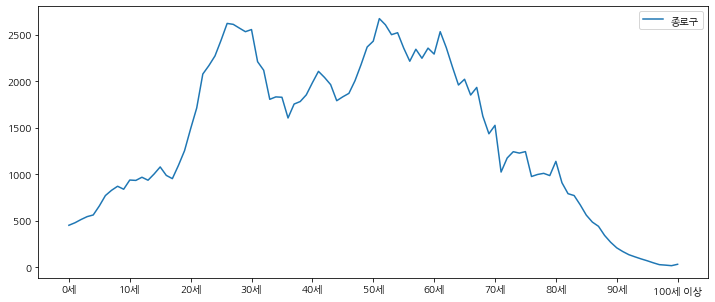

In [30]:
# 행별로 그래프 그리기
plt.plot(df_seoul.iloc[0], label=df_seoul.index[0].split(' ')[1])
plt.legend()
plt.xticks(range(0,101,10))
plt.show()
# 종로구

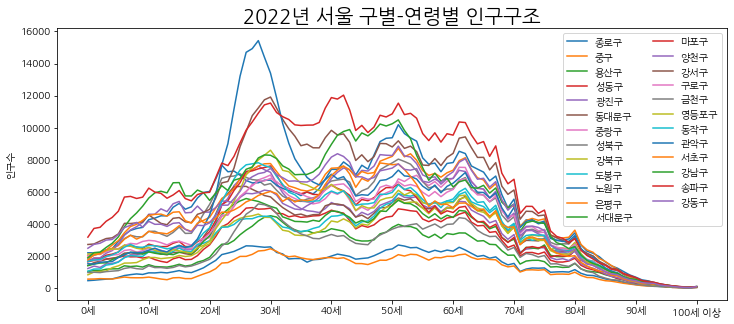

In [35]:
# 모든 행(구) 반복
for i in range(0,25):
    plt.plot(df_seoul.iloc[i], label=df_seoul.index[i].split(' ')[1])

plt.title('2022년 서울 구별-연령별 인구구조', size=20)    
plt.legend(ncol=2)
plt.xticks(range(0,101,10))
plt.ylabel('인구수')
plt.show()

# 하나씩 알아보기 힘들다.

#### 3.2.2. 서브플롯
* fig.add_subplot(행,열,순번)

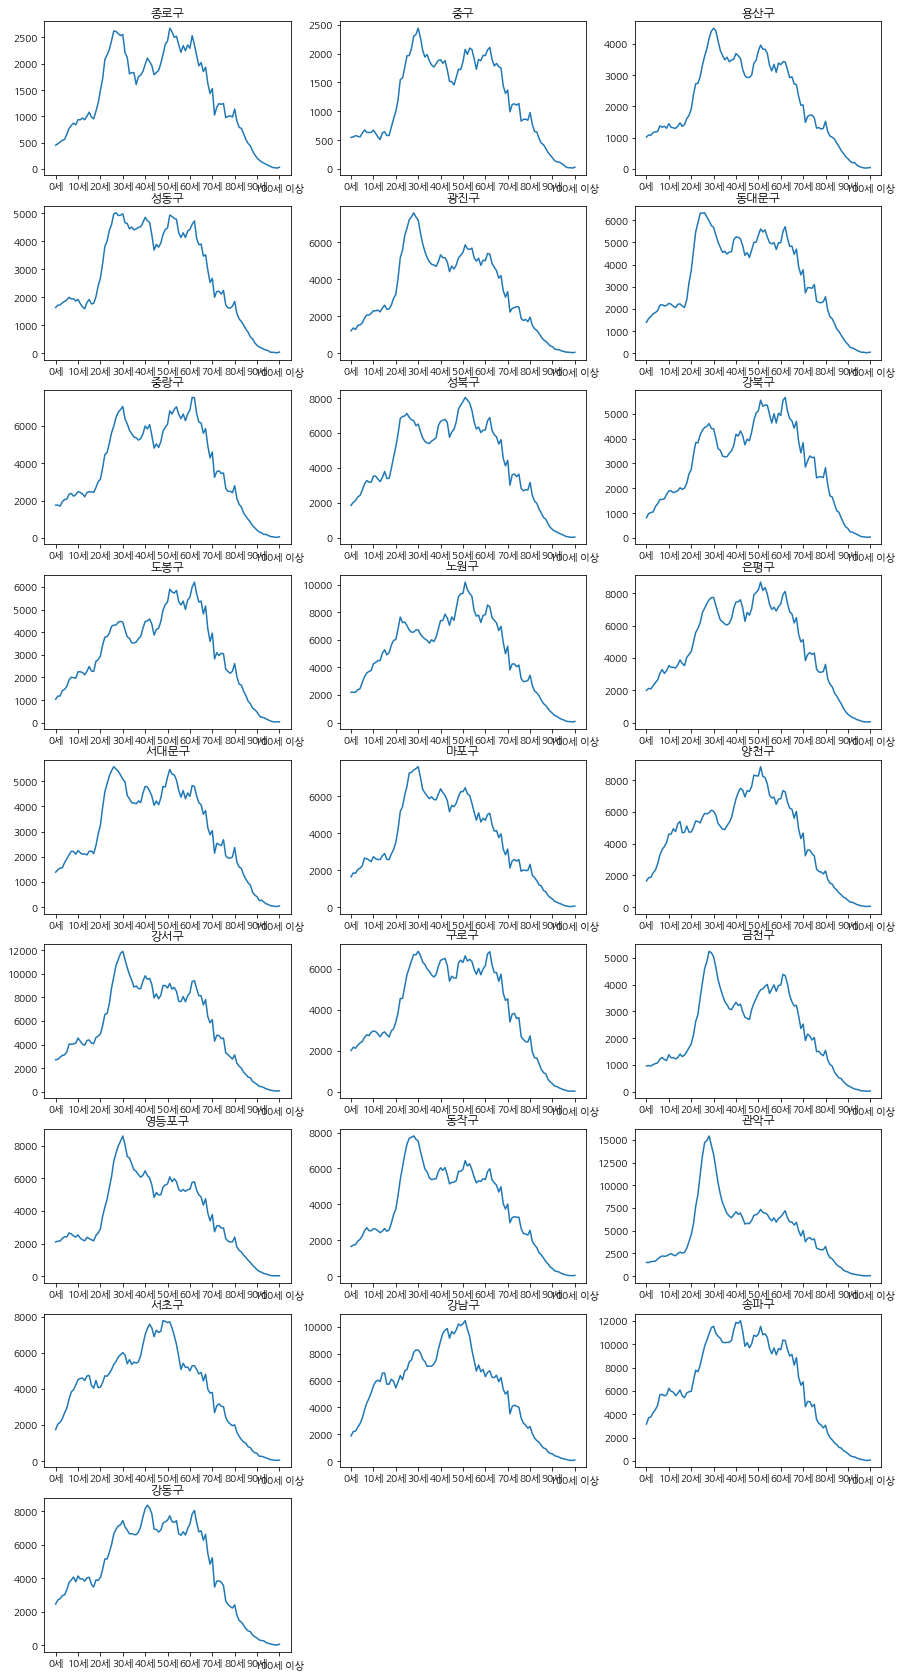

In [44]:
# 틀만들기(25개)
fig = plt.figure(figsize=(15,30))

# 그래프 그리기
for i in range(len(df_seoul)):
    ax = fig.add_subplot(9,3,i+1) 
    ax.plot(df_seoul.iloc[i])
    ax.set_title(df_seoul.index[i].split(' ')[1])
    ax.set_xticks(range(0,101,10))
plt.show()

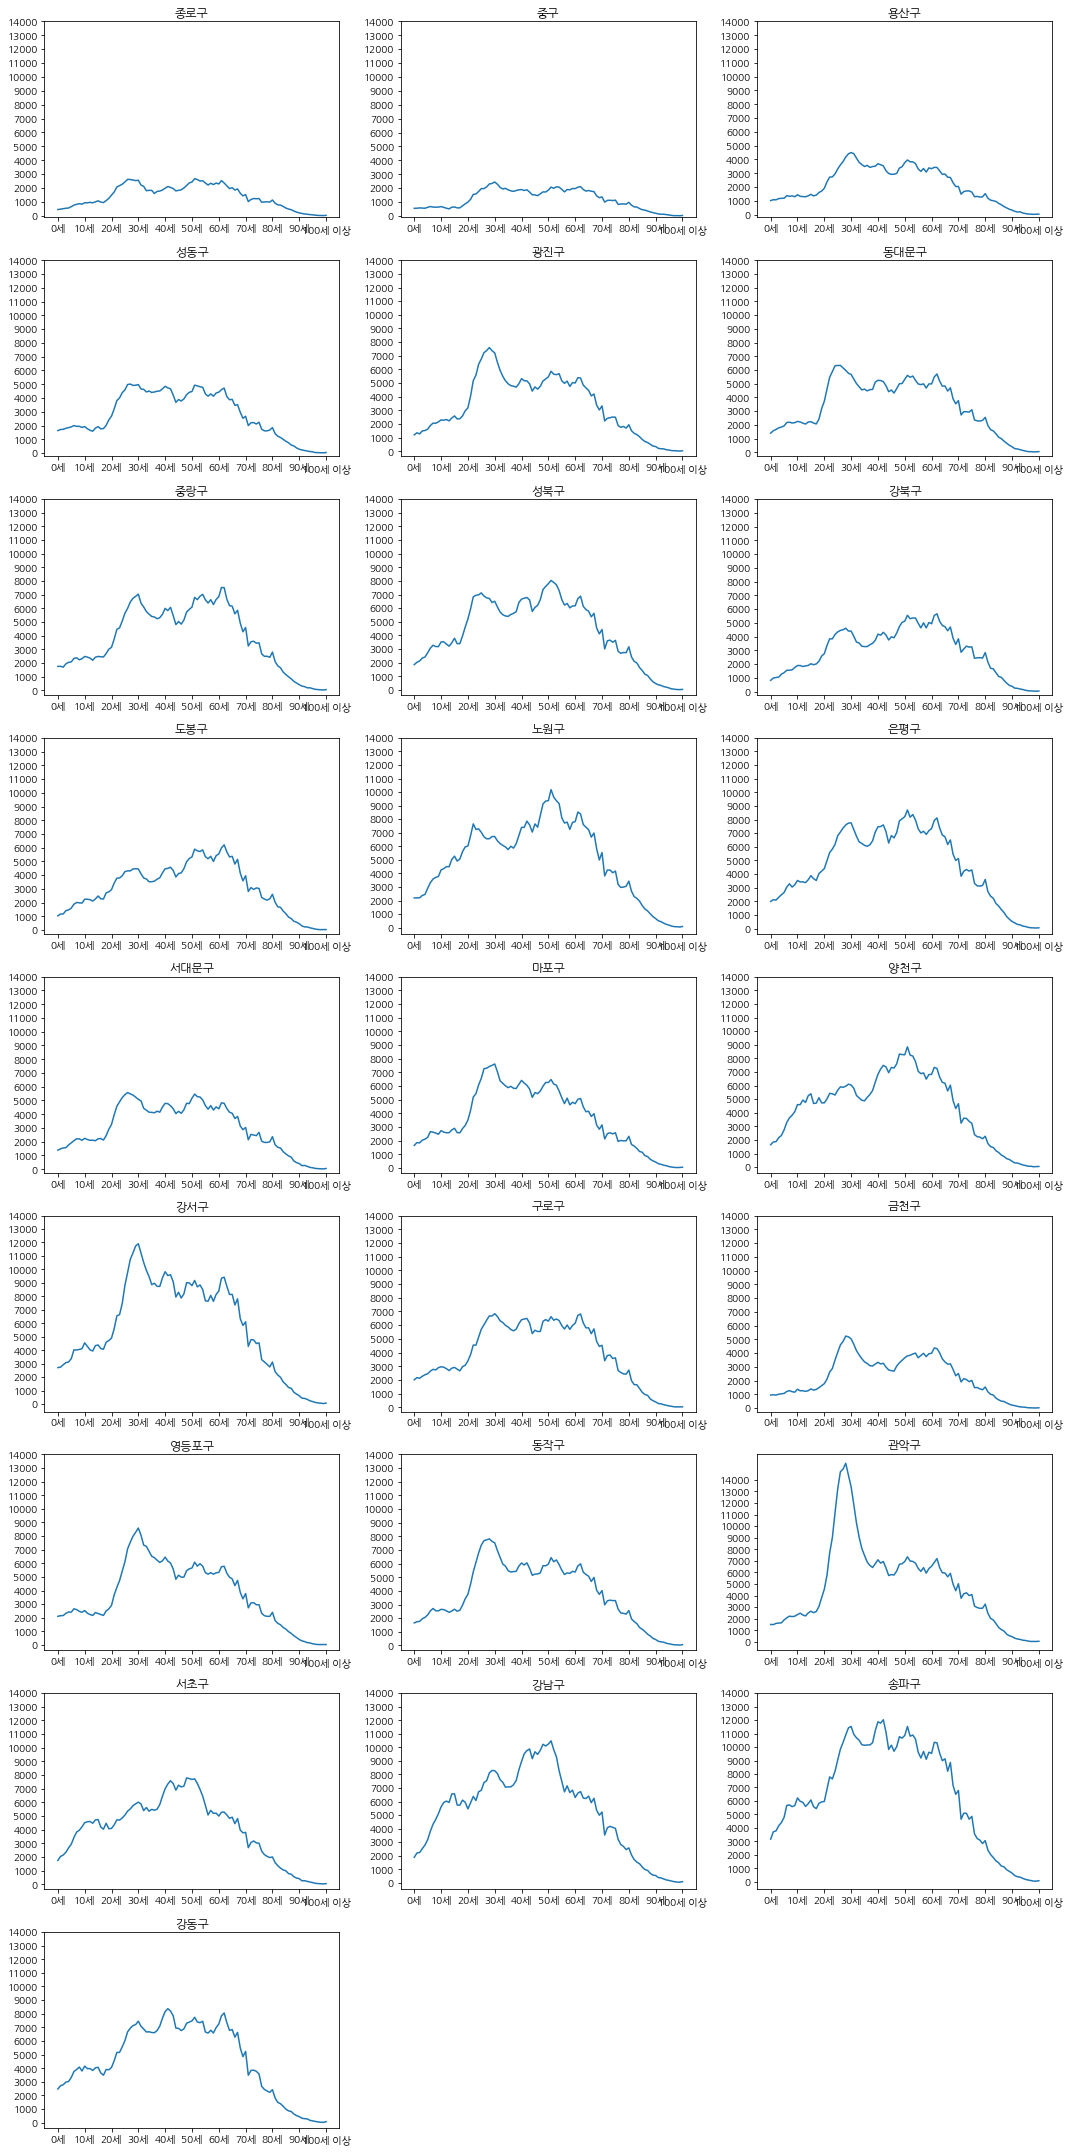

In [46]:
# 틀만들기(25개)
fig = plt.figure(figsize=(15,30))

# 그래프 그리기
for i in range(len(df_seoul)):
    ax = fig.add_subplot(9,3,i+1) 
    ax.plot(df_seoul.iloc[i])
    ax.set_title(df_seoul.index[i].split(' ')[1])
    ax.set_xticks(range(0,101,10))
    # y 틱 범위 통일
    ax.set_yticks(range(0,15000,1000))

fig.tight_layout()

# 종로구 중구는 인구수가 적다.
# 관악구는 20,30대가 많다. 강남 출퇴근 용이/ 고시촌

## 4. 특정 동 인구구조

### 4.1. 학군지 인구구조
* 대치동, 목동
* fig, ax = plt.subplots()

#### 4.1.1. 대치동, 목동 서브셋

In [50]:
df_dong = df[(df.index.str.contains('강남구 대치')) | 
             (df.index.str.contains('양천구 목'))].copy()
df_dong

,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 양천구 목1동(1147051000),78,108,117,142,210,229,353,404,431,482,...,12,18,10,10,3,1,2,3,5,1
서울특별시 양천구 목2동(1147052000),147,126,101,136,143,139,172,166,186,179,...,16,21,11,9,7,3,3,1,2,1
서울특별시 양천구 목3동(1147053000),111,120,124,110,107,136,104,140,110,95,...,16,13,13,11,5,3,3,0,3,4
서울특별시 양천구 목4동(1147054000),54,53,74,86,83,120,129,157,157,203,...,13,16,12,10,5,1,2,2,1,1
서울특별시 양천구 목5동(1147055000),82,120,136,152,216,261,375,462,501,581,...,29,24,24,16,21,6,11,2,4,0
서울특별시 강남구 대치1동(1168060000),28,55,48,70,104,141,211,242,290,383,...,12,15,11,6,3,3,3,0,3,2
서울특별시 강남구 대치2동(1168061000),83,112,118,143,164,193,222,296,350,378,...,22,14,15,11,6,8,2,1,2,2
서울특별시 강남구 대치4동(1168063000),35,36,47,45,41,60,73,75,101,107,...,12,15,4,1,4,2,1,0,0,2


#### 4.1.2. 서브플롯 그리기
* fig , ax = plt.subplots()

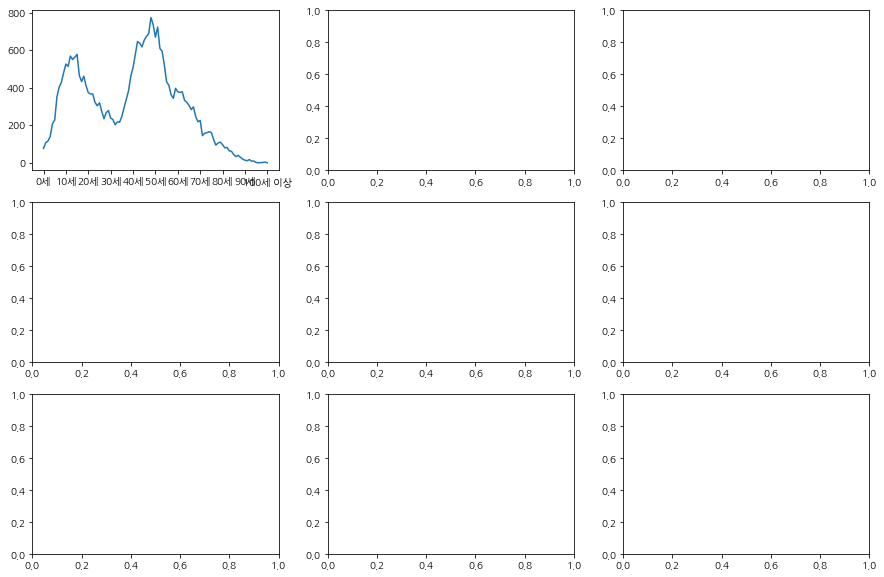

In [55]:
# 틀만들기 (8개)
fig , ax = plt.subplots(3,3, figsize=(15,10))

# 행번호 r 열번호 c
r,c=0,0
ax[r][c].plot(df_dong.iloc[0]) # 양천구 목1동
ax[r][c].set_xticks(range(0,101,10))

plt.show()

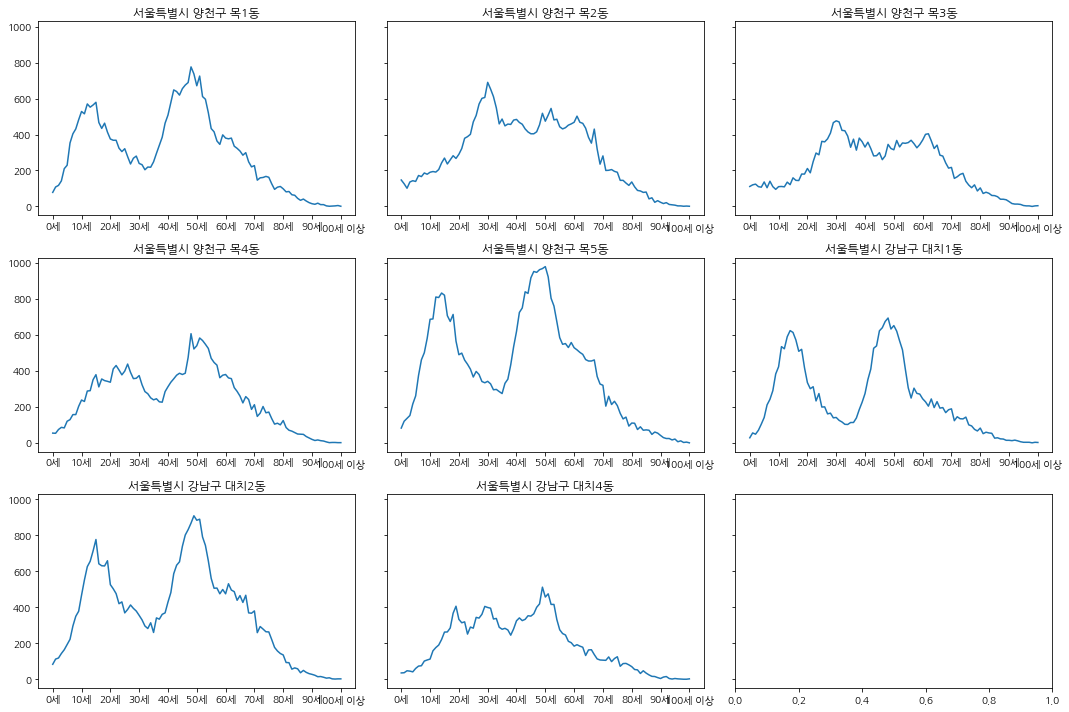

In [58]:
# y축 공유
fig , ax = plt.subplots(3,3, figsize=(15,10), sharey=True)

# 행번호 r 열번호 c
r,c=0,0

# 전체 그래프 그리기
for i in range(len(df_dong)):
    ax[r][c].plot(df_dong.iloc[i])
    ax[r][c].set_xticks(range(0,101,10))
    ax[r][c].set_title(df_dong.index[i].split('(')[0])


    # 행번호 열번호 적기
    c+=1
    if c % 3 ==0:
        r+=1
        c=0

fig.tight_layout()
# 목1동과 목5동 : 10대와 4,50대가 많다. 20대,30대는 적다. 학생과 학부모가 많아보임 -> 특히 학군지
# 목2동과 목3동은 뚜렷한 특징 없음
# 대치1동과 대치2동이 대치4동보다 학군지이다.

### 4.2. 특정 구의 동별 인구구조
* 구별 인구구조에서 관악구는 20,30대가 많은 특징을 보였다.

#### 4.2.1. 관악구 서브셋

In [77]:
df_gwan = df[df.index.str.contains('관악구')].copy()
df_gwan
# 관악구가 포함

,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 관악구 (1162000000),1505,1491,1596,1625,1642,1896,2076,2221,2182,2220,...,317,250,210,145,118,71,34,38,34,53
서울특별시 관악구 보라매동(1162052500),66,69,80,88,91,96,127,138,127,117,...,25,13,12,10,7,6,2,3,2,2
서울특별시 관악구 청림동(1162054500),128,103,114,100,95,121,136,115,97,108,...,9,18,12,8,2,1,1,0,0,3
서울특별시 관악구 성현동(1162056500),119,113,139,135,149,161,188,237,220,234,...,24,23,17,7,3,5,2,2,2,4
서울특별시 관악구 행운동(1162057500),80,82,97,79,100,94,104,102,103,112,...,15,16,12,5,3,3,1,4,2,1
서울특별시 관악구 낙성대동(1162058500),39,39,46,35,55,52,57,69,75,86,...,4,5,8,5,0,2,1,3,1,1
서울특별시 관악구 청룡동(1162059500),120,96,122,107,106,119,124,132,106,110,...,26,14,11,1,10,5,2,3,2,1
서울특별시 관악구 은천동(1162060500),142,147,121,159,155,185,202,216,213,222,...,24,14,15,15,13,5,2,3,3,2
서울특별시 관악구 중앙동(1162061500),39,35,27,36,33,38,40,43,50,37,...,11,4,2,2,2,1,2,0,0,1


#### 4.2.2. 서브플롯 그리기
* fig , ax = plt.subplots()

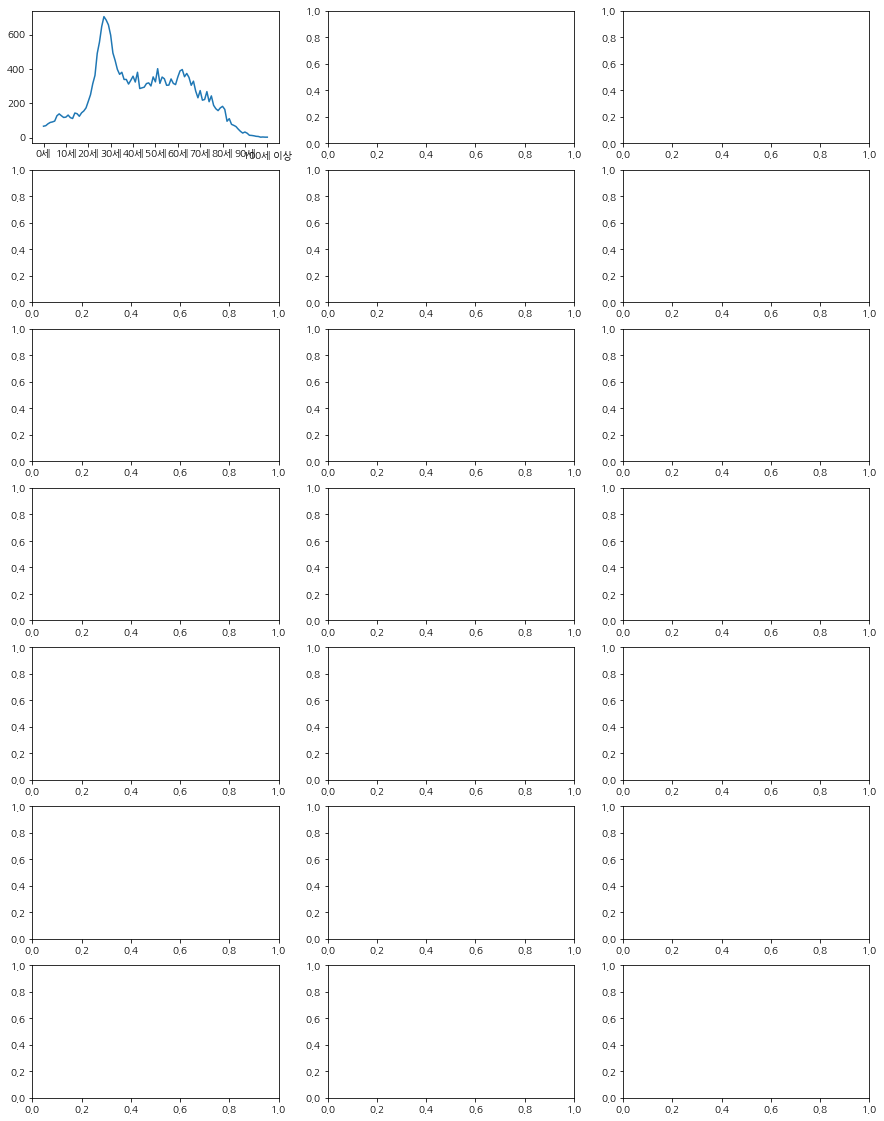

In [81]:
# 틀만들기 (21개)
fig , ax = plt.subplots(7,3, figsize=(15,20))

# 행번호 r 열번호 c
r,c=0,0
ax[r][c].plot(df_gwan.iloc[1]) # 인덱스 1이 보라매동
ax[r][c].set_xticks(range(0,101,10))

fig.show()

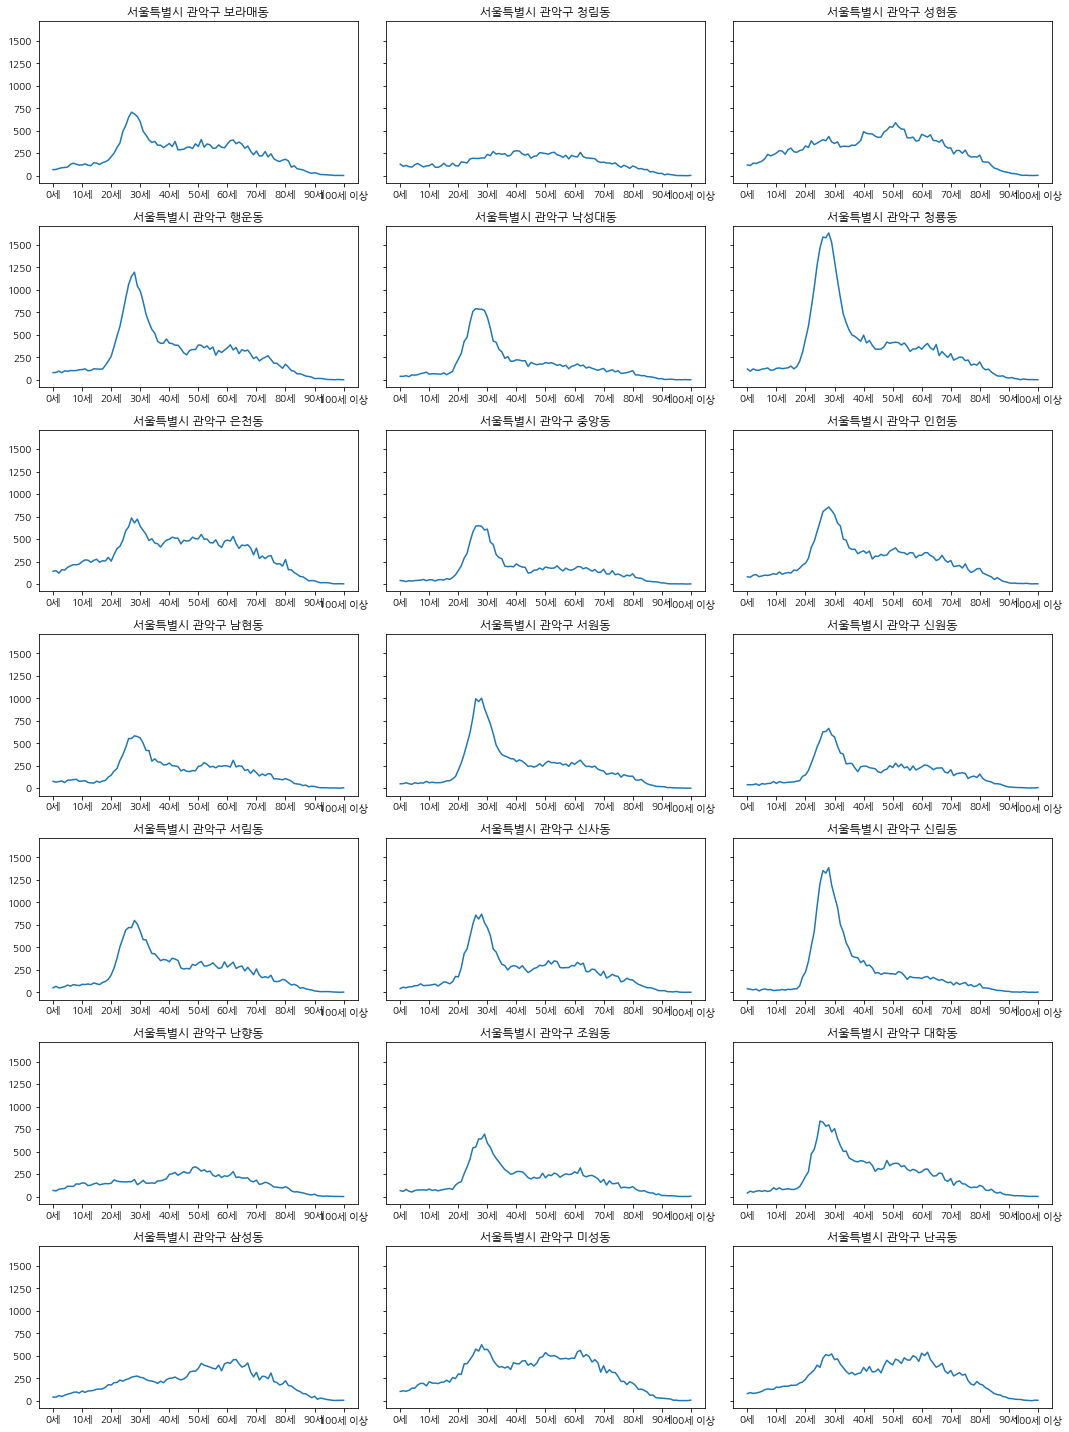

In [84]:
# y축 공유
fig , ax = plt.subplots(7,3, figsize=(15,20), sharey=True)

# 행번호 r 열번호 c
r,c=0,0

# 전체 그래프 그리기
for i in range(1,len(df_gwan)):
    ax[r][c].plot(df_gwan.iloc[i])
    ax[r][c].set_xticks(range(0,101,10))
    ax[r][c].set_title(df_gwan.index[i].split('(')[0])

    # 행번호 열번호 적기
    c+=1
    if c % 3 ==0:
        r+=1
        c=0

fig.tight_layout()
# 청룡동이 특히나 20,30대가 많다.
# 관악구라고 다 그런건 아님